<a href="https://colab.research.google.com/github/ShathaAlshalawi/Gallstone_project/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
# Step 2: Upload file
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset-uci.csv")
print(df.head())

Saving dataset-uci.csv to dataset-uci.csv
   Gallstone Status  Age  Gender  Comorbidity  Coronary Artery Disease (CAD)  \
0                 0   50       0            0                              0   
1                 0   47       0            1                              0   
2                 0   61       0            0                              0   
3                 0   41       0            0                              0   
4                 0   42       0            0                              0   

   Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)  Height  Weight  \
0               0               0                       0     185    92.8   
1               0               0                       0     176    94.5   
2               0               0                       0     171    91.1   
3               0               0                       0     168    67.7   
4               0               0                       0     178    89.6   

   ...  High D

In [24]:
# Step 3: Function to run Decision Tree safely
def run_decision_tree(X, y, test_size=0.2, criterion="gini"):
    """
    Function to apply Decision Tree on dataset with
    Confusion Matrix and Tree visualization.

    Parameters:
    - X: Features (DataFrame)
    - y: Target column (Series)
    - test_size: Test set proportion
    - criterion: Split criterion ('gini' or 'entropy')
    """

    # 1Ô∏è‚É£ Convert categorical columns to numeric (if any)
    X_numeric = pd.get_dummies(X)

    # 2Ô∏è‚É£ Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_numeric, y, test_size=test_size, random_state=42
    )

    # 3Ô∏è‚É£ Create Decision Tree model
    clf = DecisionTreeClassifier(
        criterion=criterion,
        random_state=42,
        max_depth=3
    )
    clf.fit(X_train, y_train)

    # 4Ô∏è‚É£ Predict test set
    y_pred = clf.predict(X_test)

    # 5Ô∏è‚É£ Compute accuracy and confusion matrix
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"üîπ Split criterion: {criterion}")
    print(f"üîπ Train/Test split: {int((1-test_size)*100)}% / {int(test_size*100)}%")
    print(f"‚úÖ Accuracy: {acc:.3f}")
    print("üßæ Confusion Matrix:\n", cm)
    print("-"*60)

    # 6Ô∏è‚É£ Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Decision Tree ({criterion}) - {int((1-test_size)*100)}% Train")
    plt.show()

    # 7Ô∏è‚É£ Plot decision tree
    plt.figure(figsize=(20,10))
    plot_tree(
        clf,
        filled=True,
        feature_names=X_numeric.columns,
        class_names=["Present","Absent"],
        fontsize=8
    )
    plt.title(f"Decision Tree Structure ({criterion}) - {int((1-test_size)*100)}% Train")
    plt.show()


üîπ Split criterion: gini
üîπ Train/Test split: 90% / 10%
‚úÖ Accuracy: 0.656
üßæ Confusion Matrix:
 [[12  4]
 [ 7  9]]
------------------------------------------------------------


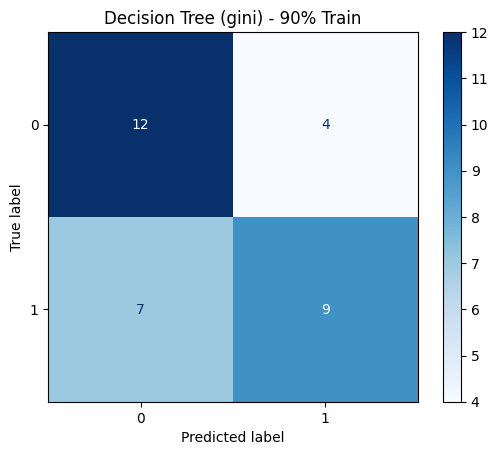

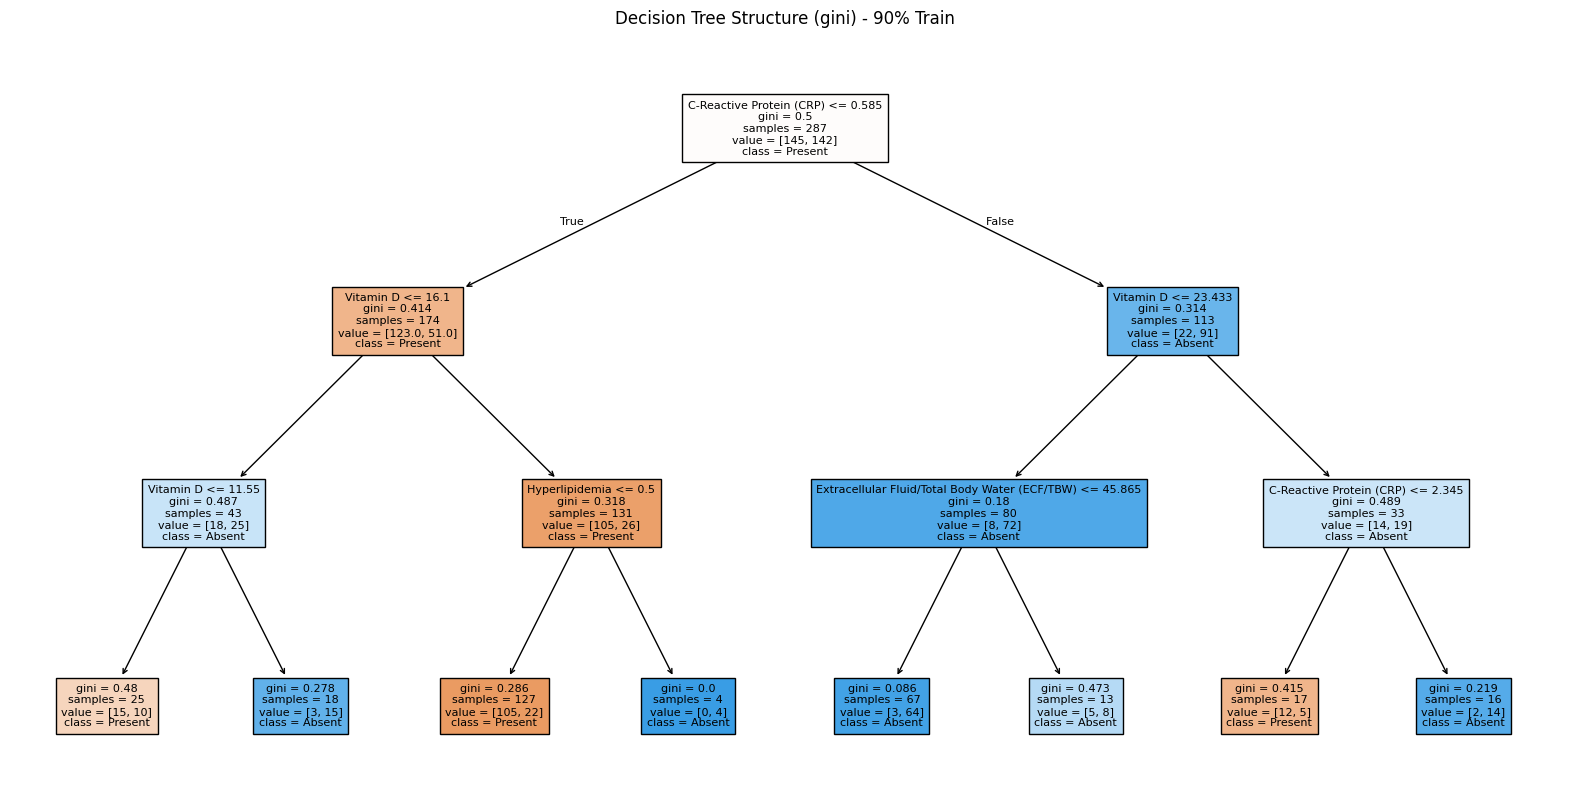

üîπ Split criterion: gini
üîπ Train/Test split: 80% / 20%
‚úÖ Accuracy: 0.656
üßæ Confusion Matrix:
 [[28  5]
 [17 14]]
------------------------------------------------------------


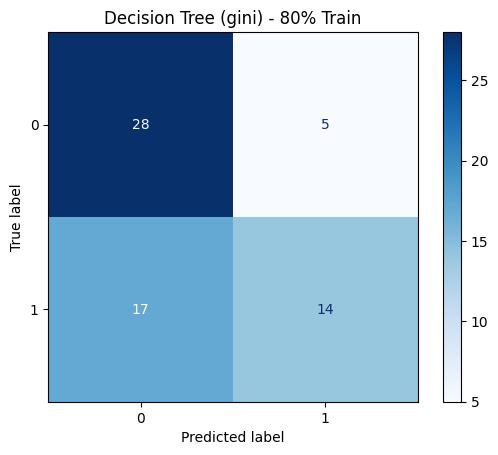

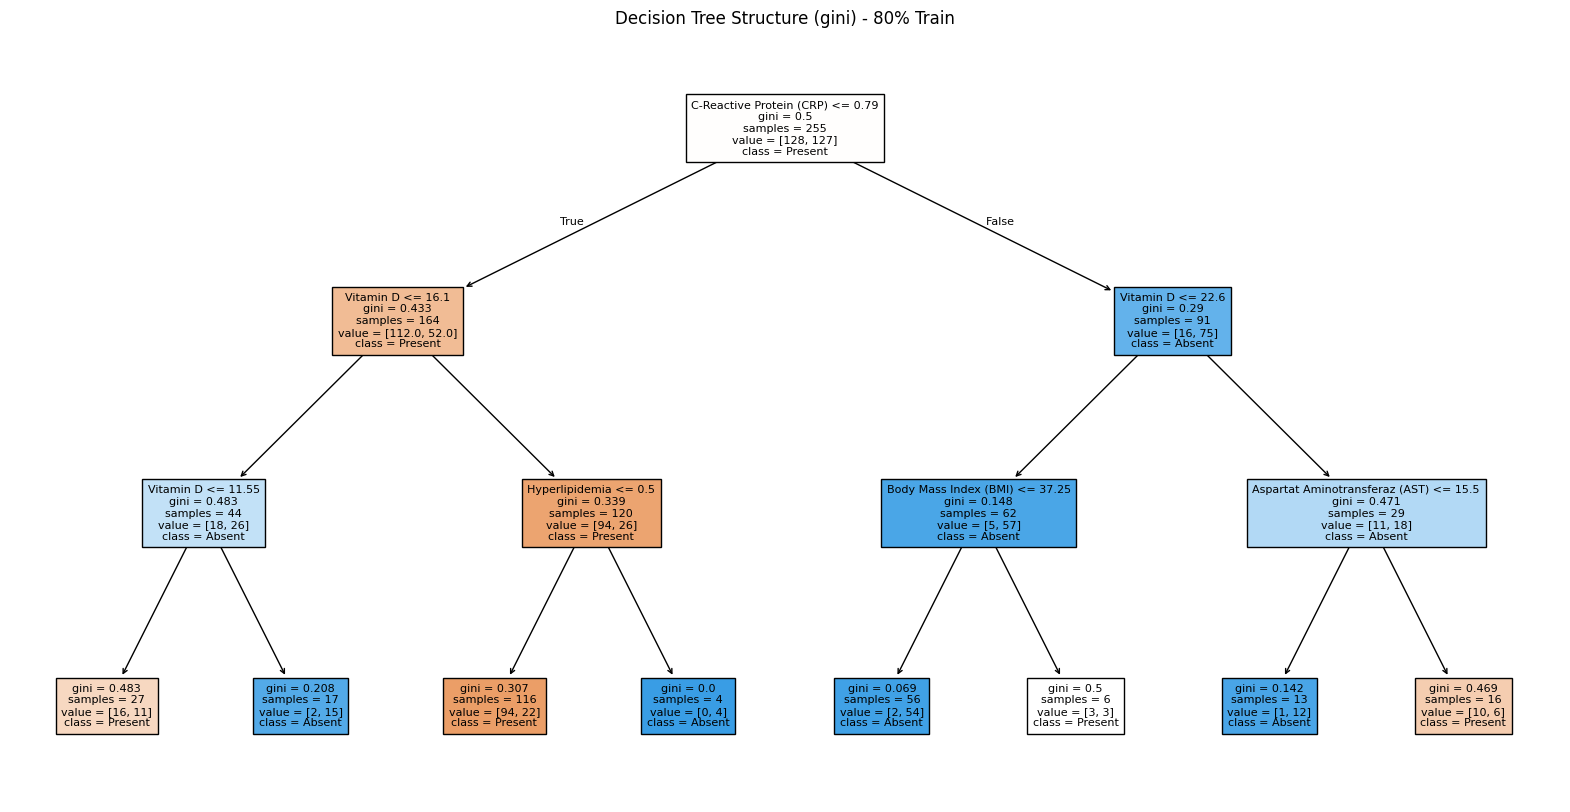

üîπ Split criterion: gini
üîπ Train/Test split: 70% / 30%
‚úÖ Accuracy: 0.760
üßæ Confusion Matrix:
 [[39 11]
 [12 34]]
------------------------------------------------------------


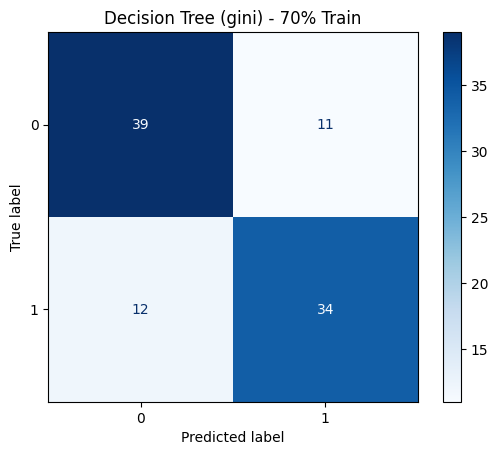

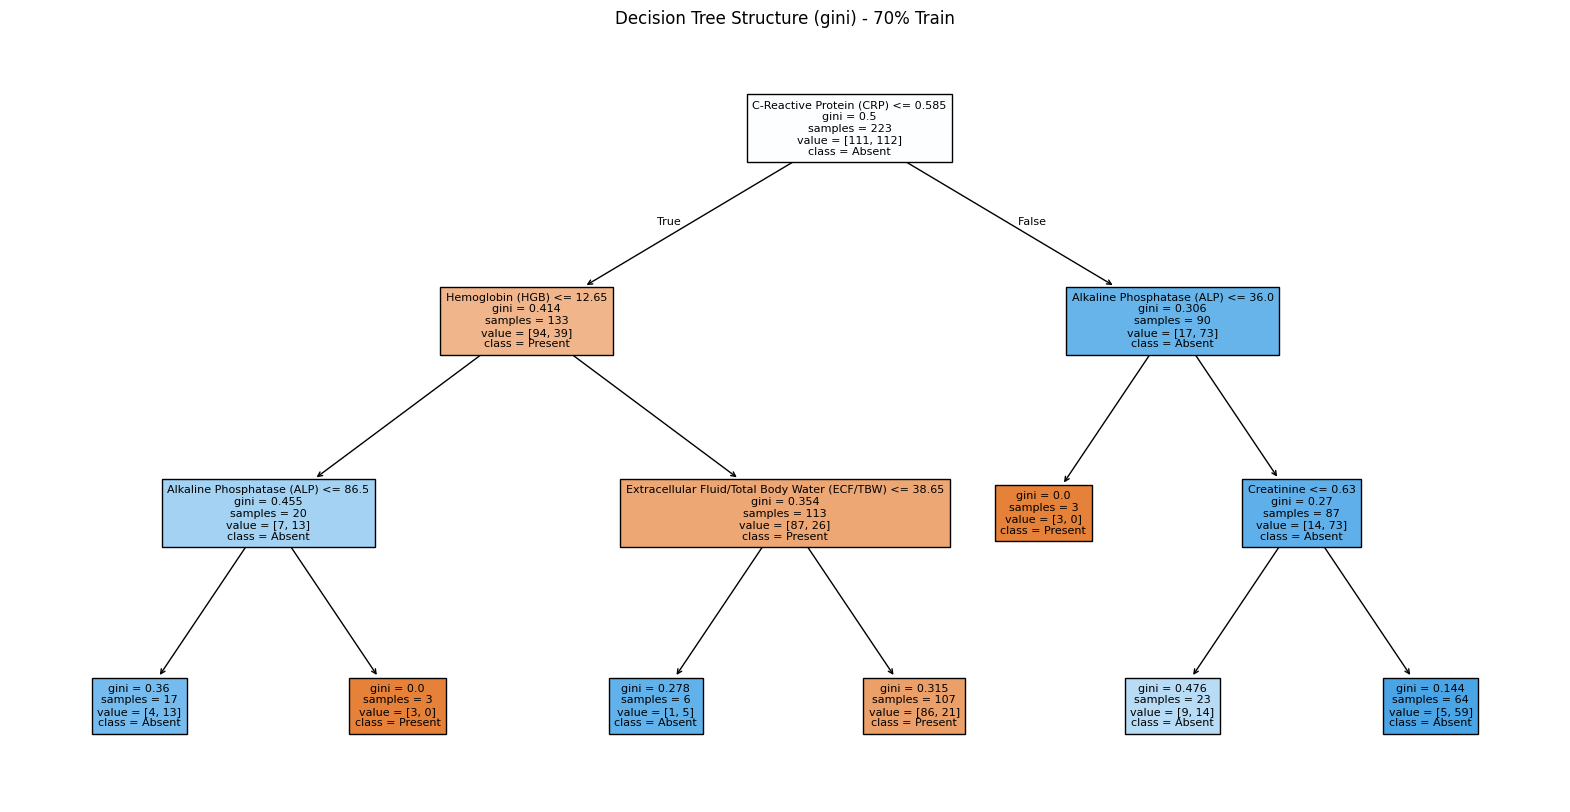

üîπ Split criterion: entropy
üîπ Train/Test split: 90% / 10%
‚úÖ Accuracy: 0.656
üßæ Confusion Matrix:
 [[12  4]
 [ 7  9]]
------------------------------------------------------------


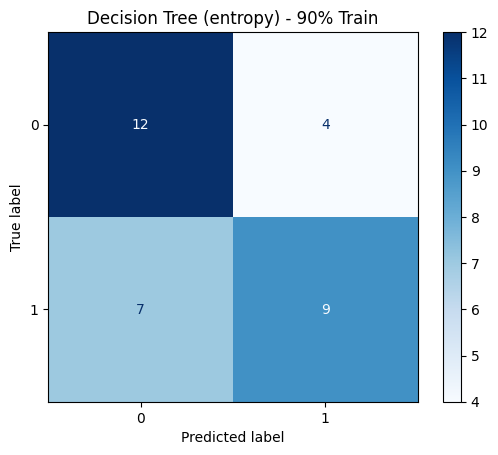

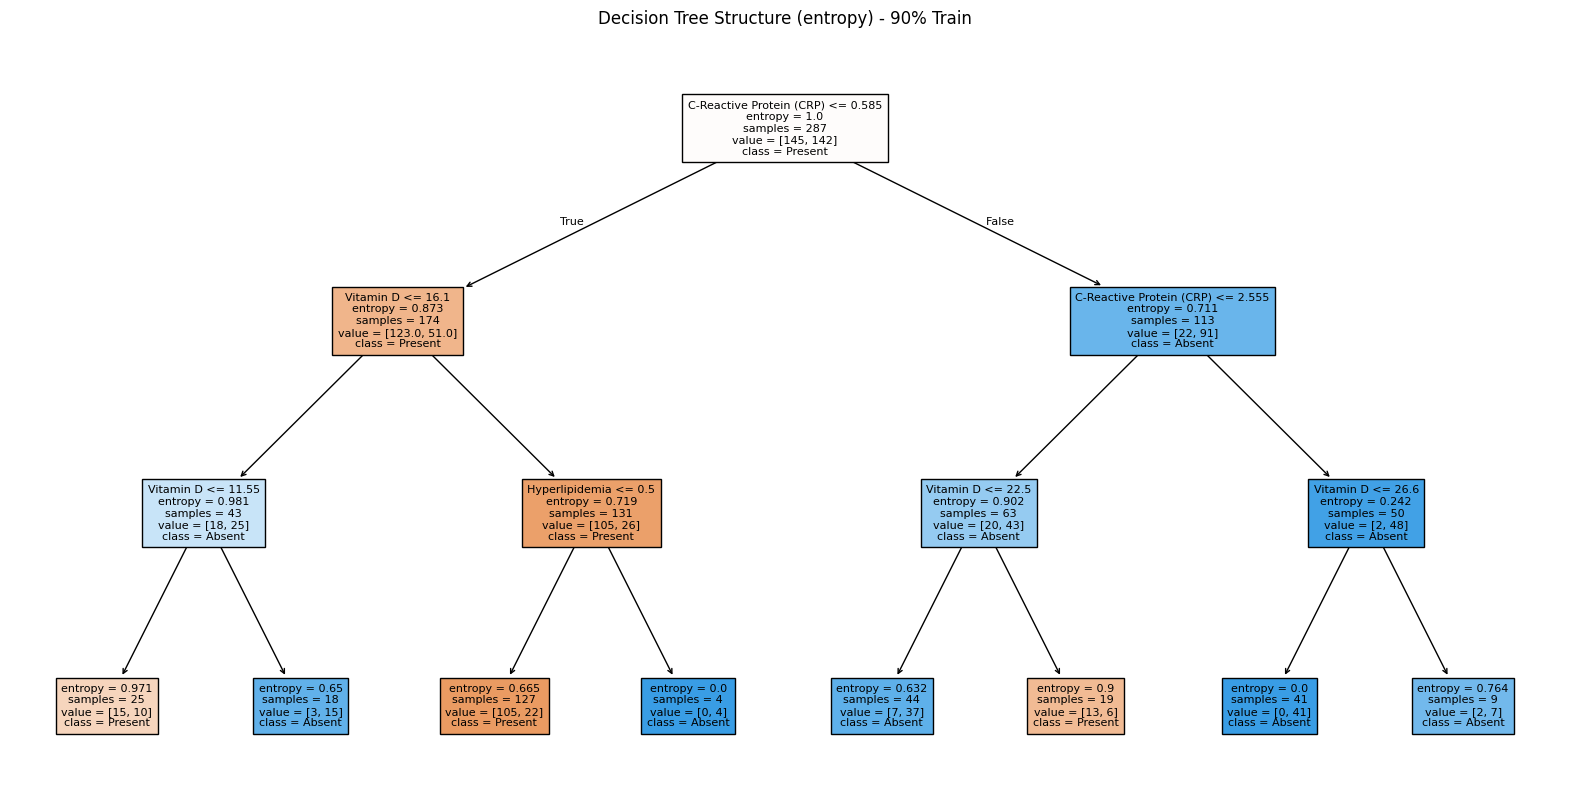

üîπ Split criterion: entropy
üîπ Train/Test split: 80% / 20%
‚úÖ Accuracy: 0.734
üßæ Confusion Matrix:
 [[27  6]
 [11 20]]
------------------------------------------------------------


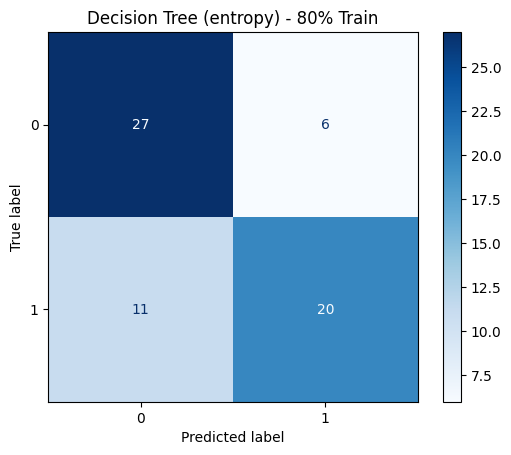

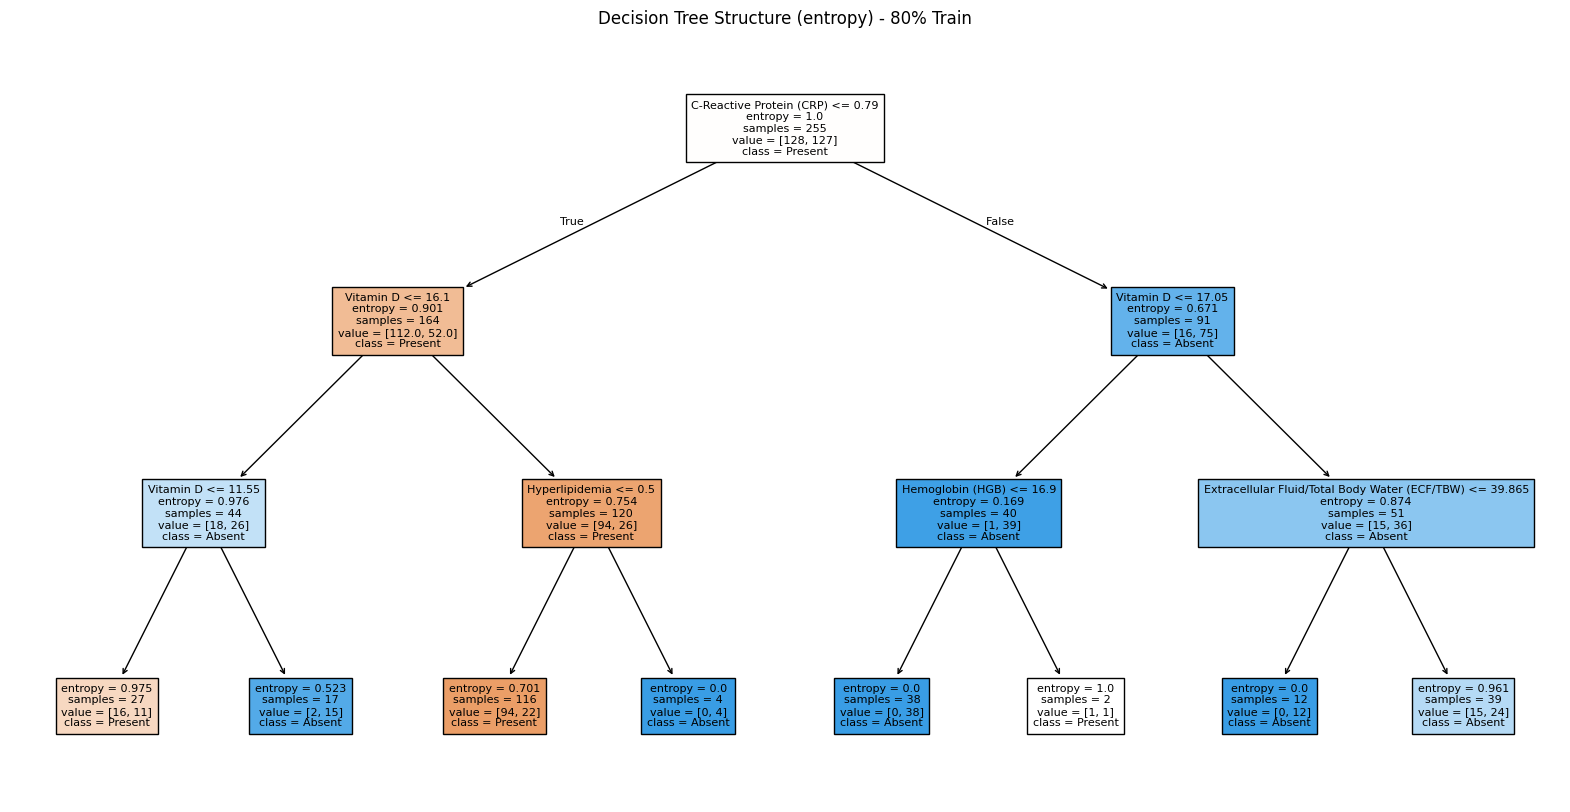

üîπ Split criterion: entropy
üîπ Train/Test split: 70% / 30%
‚úÖ Accuracy: 0.740
üßæ Confusion Matrix:
 [[41  9]
 [16 30]]
------------------------------------------------------------


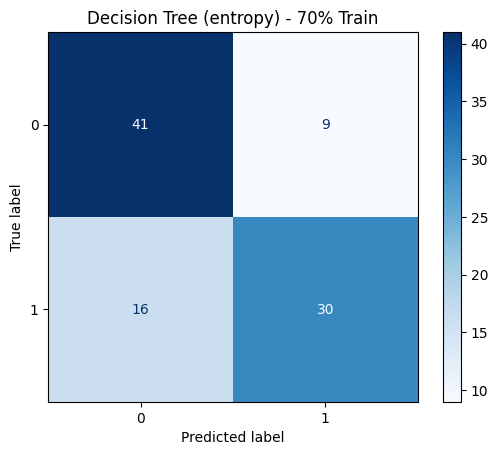

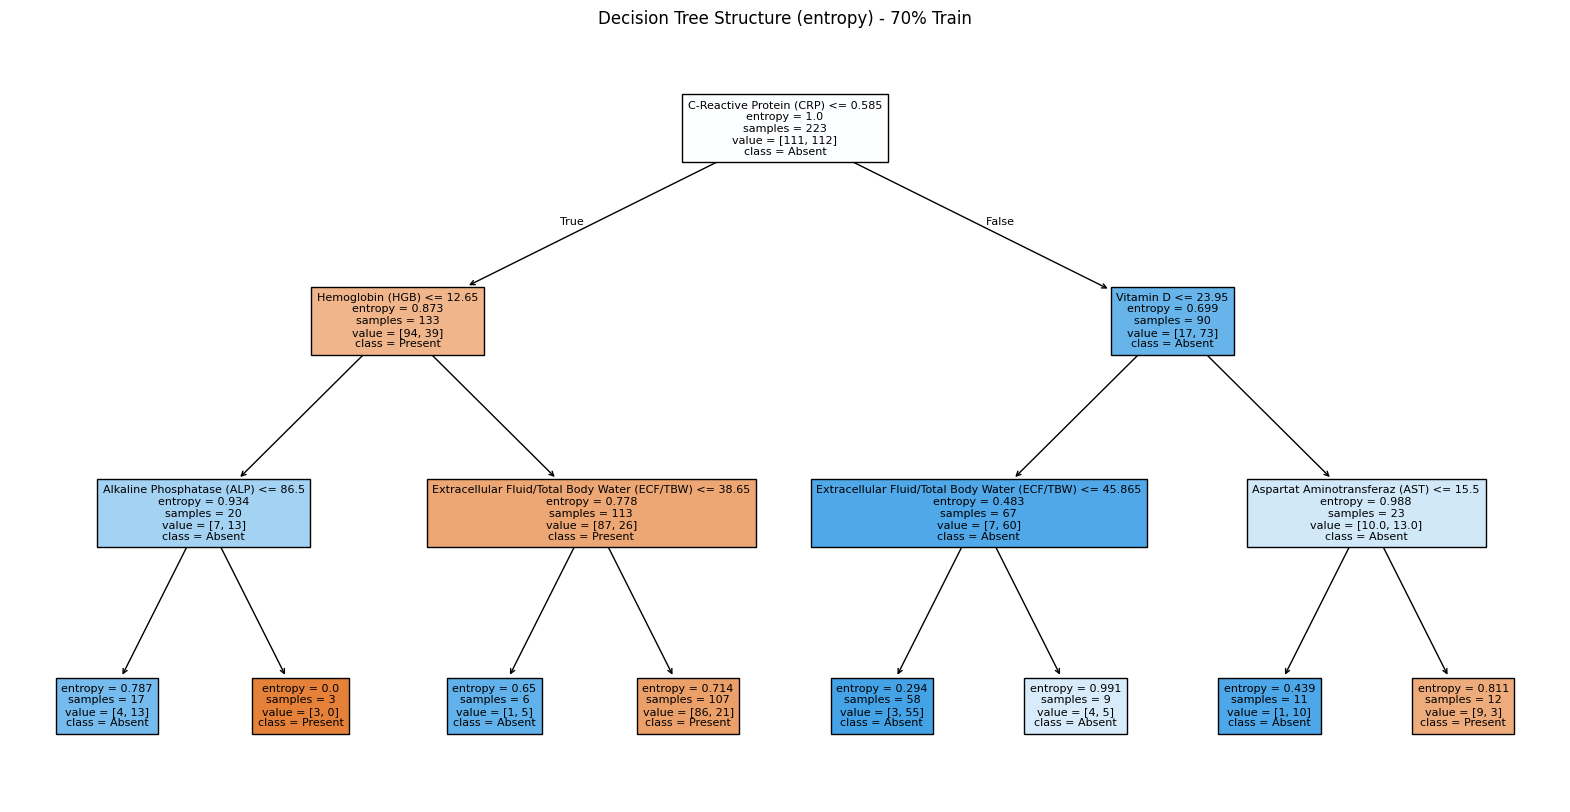

In [27]:
# Step 4: Define features (X) and target (y)
X = df.drop("Gallstone Status", axis=1)
y = df["Gallstone Status"]

splits = [0.1, 0.2, 0.3]
criteria = ["gini", "entropy"]
for crit in criteria:
    for s in splits:
        run_decision_tree(X, y, test_size=s, criterion=crit)

In [28]:
# Step 5: Save the dataset
df.to_csv("Preprocessed_dataset.csv", index=False)